In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('G:/research papers/diabetes prediction/diabetes_data_upload.csv')

In [3]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
from sklearn.preprocessing import LabelEncoder
for i in data.columns:
    if data[i].dtype=='object':
        lbl=LabelEncoder()
        lbl.fit(list(data[i].values))
        data[i]=lbl.transform(list(data[i].values))

In [5]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


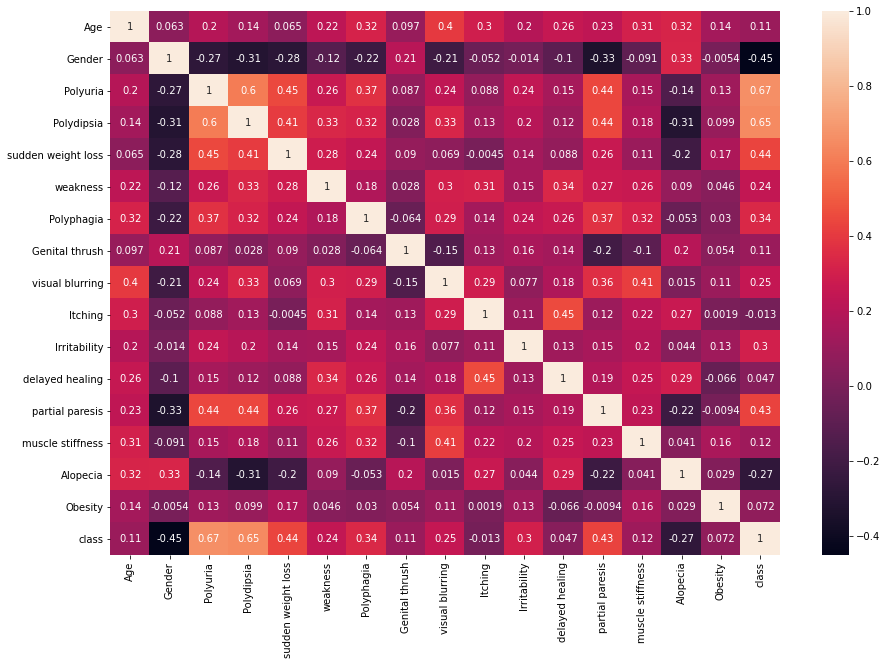

In [6]:
import seaborn as sns 
corrdata=data.corr()
ax,fig=plt.subplots(figsize=(15,10))
sns.heatmap(corrdata,annot=True)

In [7]:
drop_list = ['Genital thrush','Itching','delayed healing','muscle stiffness','Alopecia','Obesity']
data_1 = data.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
data_1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Irritability,partial paresis,class
0,40,1,0,1,0,1,0,0,0,0,1
1,58,1,0,0,0,1,0,1,0,1,1
2,41,1,1,0,0,1,1,0,0,0,1
3,45,1,0,0,1,1,1,0,0,0,1
4,60,1,1,1,1,1,1,1,1,1,1


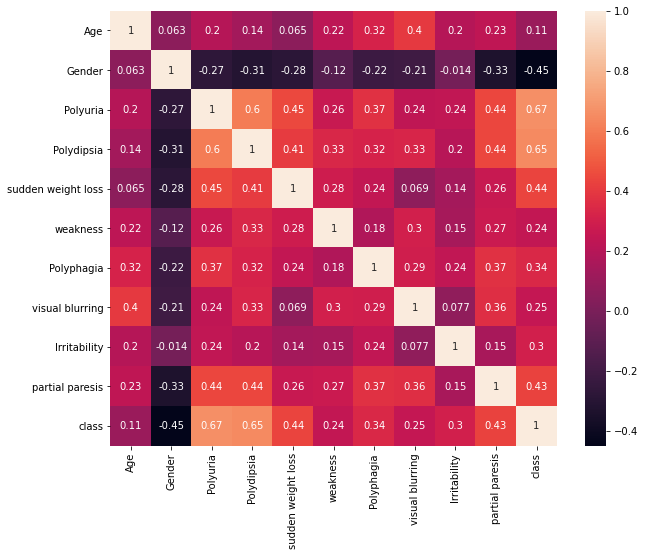

In [8]:
corrdata1=data_1.corr()
ax,fig=plt.subplots(figsize=(10,8))
sns.heatmap(corrdata1,annot=True)

In [9]:
data_1.shape

(520, 11)

In [10]:
X = data_1.iloc[:,0:9]
y = data_1.iloc[:,10]

In [11]:
print(X.shape)
print(y.shape)

(520, 9)
(520,)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =21)

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_classifier(optimizer):
     classifier = Sequential()
     classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
     classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
     classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
     classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
     classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
     return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [1, 5],
              'epochs': [100, 120],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model=Sequential()
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu',input_dim=9))
#model.add(Dropout(rate=0.1))
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))
#model.add(Dropout(rate=0.1))
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
#model.add(Dropout(rate=0.1))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
x_val=X_train[:52]
partial_x_train=X_train[52:]
y_val=y_train[:52]
partial_y_train=y_train[52:]

In [17]:
history = model.fit(X_train,y_train,validation_data=(x_val,y_val), epochs=500, batch_size=1)

 364/500
468/468 [==============================] - 0s 918us/step - loss: 0.0764 - accuracy: 0.9679 - val_loss: 0.1214 - val_accuracy: 0.9423
Epoch 365/500
468/468 [==============================] - 0s 970us/step - loss: 0.0853 - accuracy: 0.9658 - val_loss: 0.1014 - val_accuracy: 0.9423
Epoch 366/500
468/468 [==============================] - 0s 976us/step - loss: 0.1189 - accuracy: 0.9530 - val_loss: 0.0991 - val_accuracy: 0.9423
Epoch 367/500
468/468 [==============================] - 0s 950us/step - loss: 0.0900 - accuracy: 0.9637 - val_loss: 0.1378 - val_accuracy: 0.9231
Epoch 368/500
468/468 [==============================] - 0s 938us/step - loss: 0.0778 - accuracy: 0.9722 - val_loss: 0.1023 - val_accuracy: 0.9423
Epoch 369/500
468/468 [==============================] - 0s 954us/step - loss: 0.0751 - accuracy: 0.9722 - val_loss: 0.0989 - val_accuracy: 0.9423
Epoch 370/500
468/468 [==============================] - 0s 945us/step - loss: 0.1102 - accuracy: 0.9615 - val_loss: 0.0941

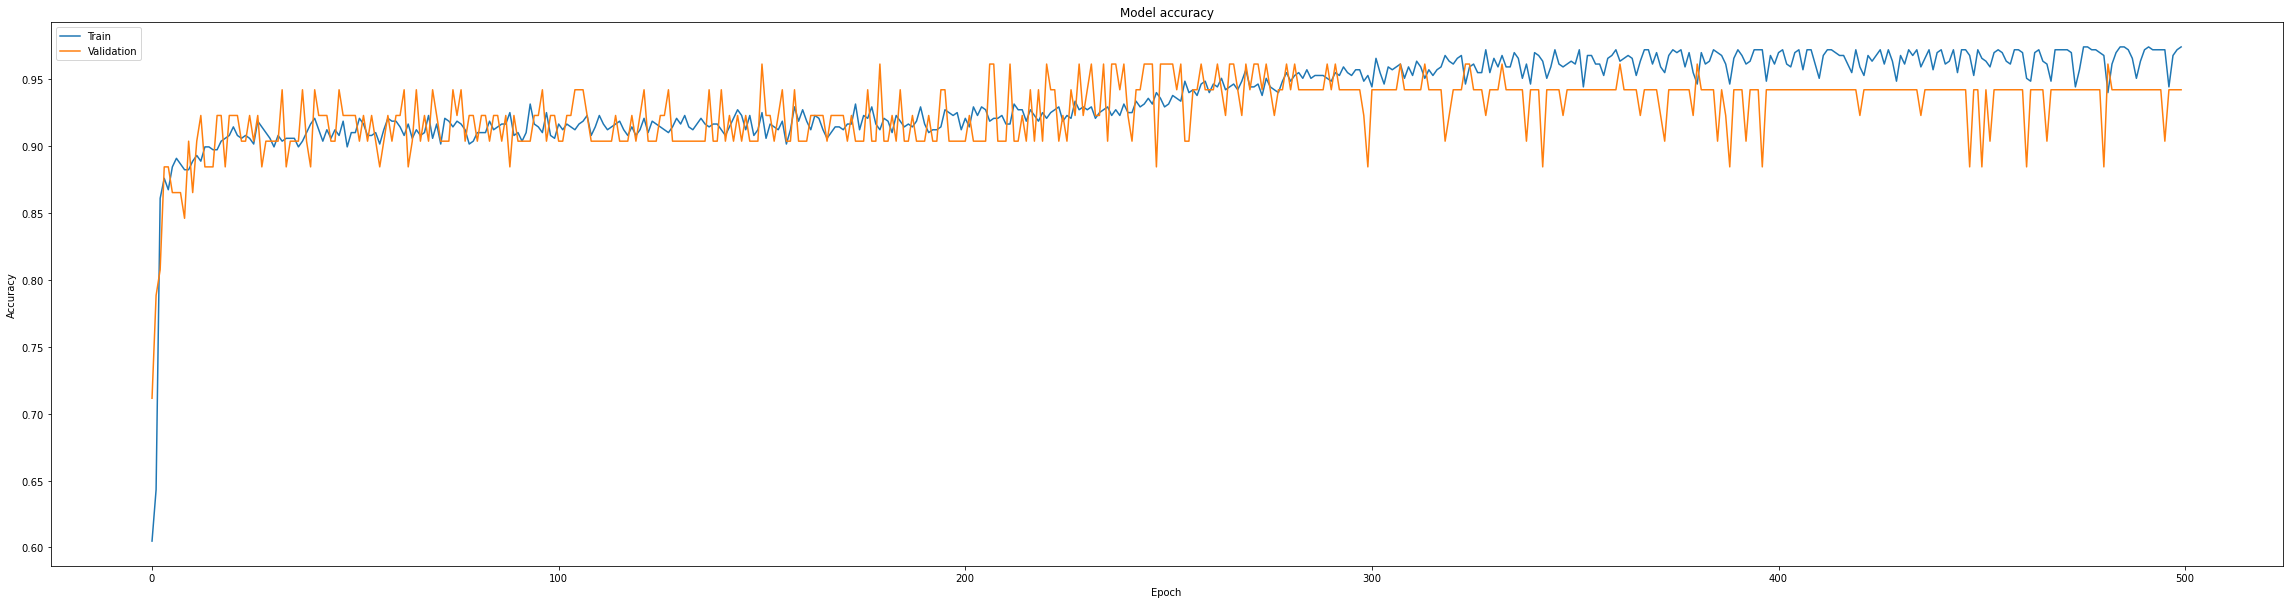

In [18]:
plt.figure(figsize=(40,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

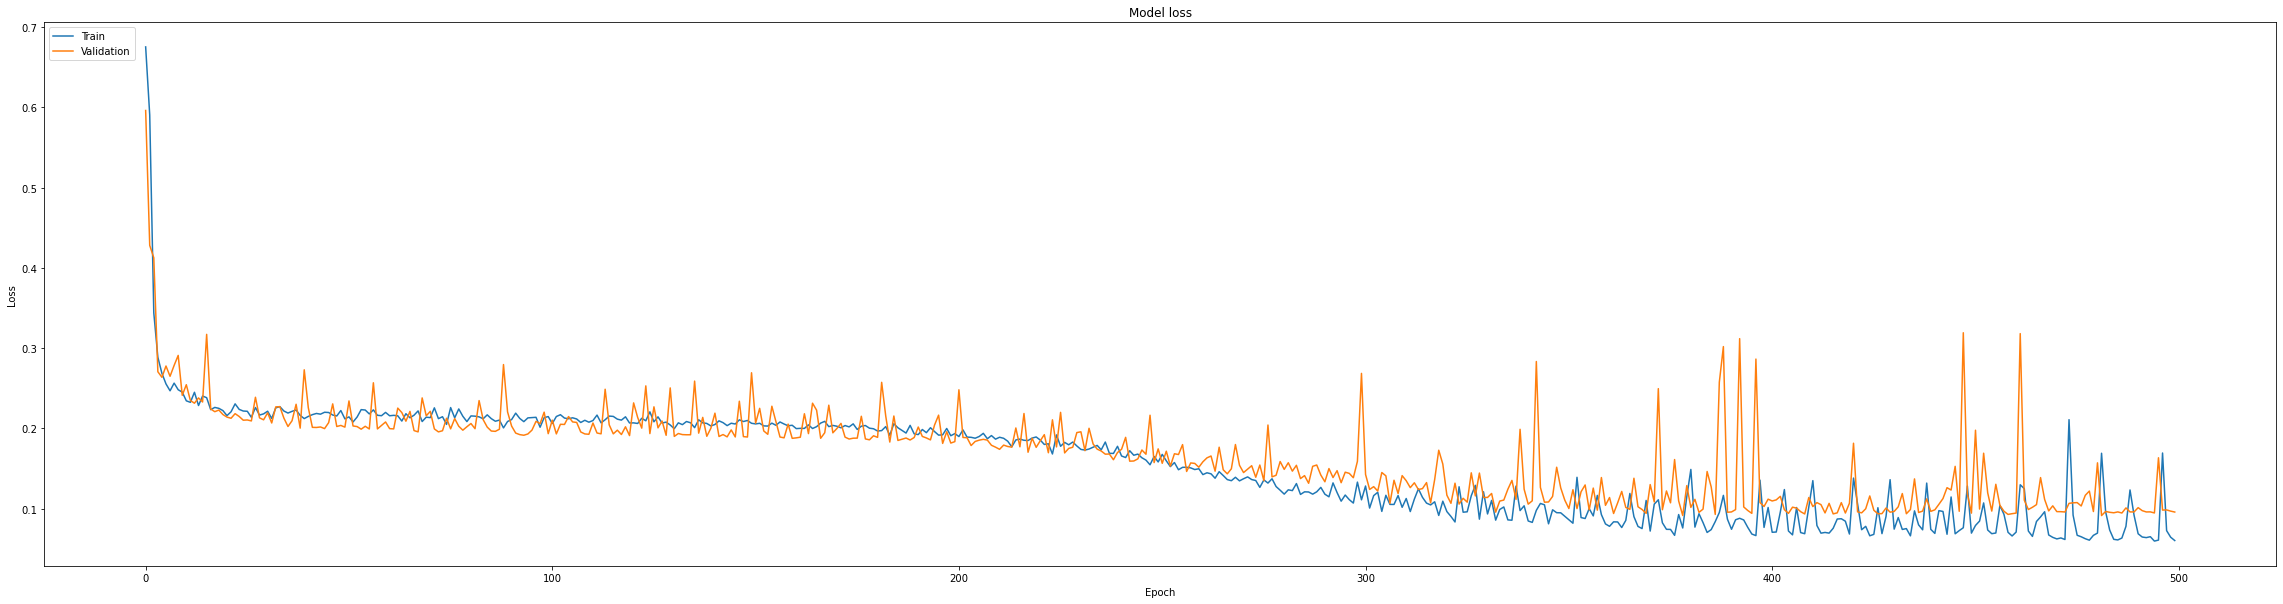

In [19]:
plt.figure(figsize=(40,10))
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Validation'], loc='upper left') 
plt.show()

In [20]:
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]
print(y_pred)

[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]


In [21]:
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15  1]
 [ 1 35]]


In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.9615384615384616


In [23]:
print(roc_auc_score(y_test,y_pred))

0.9548611111111112


In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [25]:
from sklearn.metrics import auc
auc_model = auc(fpr, tpr)

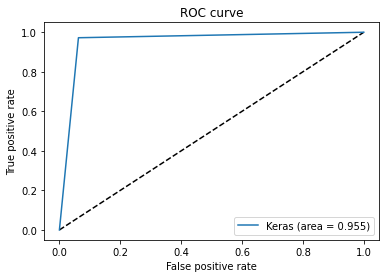

In [26]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_model))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

RANDOM FORESTS

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=500,max_depth=8,max_features='auto',criterion='gini').fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(accuracy_score(rfc_pred, y_test))

0.9615384615384616


In [29]:
print("Accuracy on training set: {:.3f} ".format(rfc.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(rfc.score(X_test,y_test)))

Accuracy on training set: 0.991 
Accuracy on test set: 0.962


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.97      0.97      0.97        36

    accuracy                           0.96        52
   macro avg       0.95      0.95      0.95        52
weighted avg       0.96      0.96      0.96        52



In [31]:
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
cm = confusion_matrix(y_test, rfc_pred)
print(cm)

[[15  1]
 [ 1 35]]


In [32]:
print(roc_auc_score(y_test,rfc_pred))

0.9548611111111112


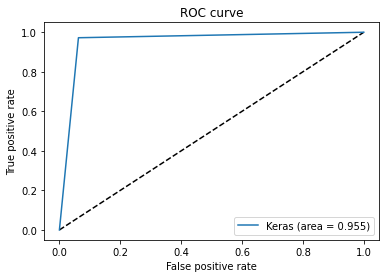

In [33]:
from sklearn.metrics import roc_curve
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc_pred)

from sklearn.metrics import auc
auc_model = auc(fpr_rfc, tpr_rfc)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rfc, tpr_rfc, label='Keras (area = {:.3f})'.format(auc_model))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [34]:
from sklearn.model_selection import cross_val_score
num_folds = 10
from sklearn.model_selection import KFold,GridSearchCV
kfold = KFold(n_splits=num_folds, random_state=21)
cv_results = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring='accuracy')
print(cv_results.mean())

0.9509250693802036
